In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The image below (RoadTrip_NYC_to_L.A.JPG) shows possible routes to take on a road trip.  The nodes represent city names and vertices are the assumed hours the drive would take.

![title](RoadTrip_NYC_to_L.A.jpg)

In [76]:
#Initialize Nodes
graph = {}
graph['New York'] = {}
graph['Washington DC'] = {}
graph['Atlanta'] = {}
graph['New Orleans'] = {}
graph['Dallas'] = {}
graph['Indianapolis'] = {}
graph['Kansas City'] = {}
graph['Denver'] = {}
graph['Pittsburgh'] = {}
graph['Cincinnati'] = {}
graph['St Louis'] = {}
graph['Oklahoma City'] = {}
graph['Albuquerque'] = {}
graph['Salt Lake City'] = {}
graph['Phoenix'] = {}
graph['Las Vegas'] = {}
graph['San Diego'] = {}
graph['Los Angeles'] = {}

In [77]:
#Establish neighbor relationships
graph['New York']['Washington DC'] = 2
graph['New York']['Pittsburgh'] = 7
graph['New York']['Indianapolis'] = 11

graph['Washington DC']['Atlanta'] = 2
graph['Atlanta']['New Orleans'] = 2
graph['New Orleans']['Dallas'] = 2
graph['Dallas']['Albuquerque'] = 2
graph['Albuquerque']['Phoenix'] = 2
graph['Phoenix']['Las Vegas'] = 2
graph['Phoenix']['San Diego'] = 5
graph['San Diego']['Los Angeles'] = 2
graph['Las Vegas']['San Diego'] = 2
graph['Las Vegas']['Los Angeles'] = 5

graph['Indianapolis']['Kansas City'] = 8
graph['Kansas City']['Denver'] = 7
graph['Denver']['Salt Lake City'] = 6
graph['Salt Lake City']['Las Vegas'] = 9

graph['Pittsburgh']['Cincinnati'] = 6
graph['Cincinnati']['St Louis'] = 8
graph['St Louis']['Oklahoma City'] = 7
graph['Oklahoma City']['Albuquerque'] = 9

In [78]:
#Create cost table
infinity = float("inf")

costs = {}

costs['Washington DC'] = 2
costs['Atlanta'] = infinity
costs['New Orleans'] = infinity
costs['Dallas'] = infinity
costs['Indianapolis'] = 11
costs['Kansas City'] = infinity
costs['Denver'] = infinity
costs['Pittsburgh'] = 7
costs['Cincinnati'] = infinity
costs['St Louis'] = infinity
costs['Oklahoma City'] = infinity
costs['Albuquerque'] = infinity
costs['Salt Lake City'] = infinity
costs['Phoenix'] = infinity
costs['Las Vegas'] = infinity
costs['San Diego'] = infinity
costs['Los Angeles'] = infinity

In [79]:
#Create parent table
parents = {}

parents['Washington DC'] = "New York"
parents['Atlanta'] = None
parents['New Orleans'] = None
parents['Dallas'] = None
parents['Indianapolis'] = "New York"
parents['Kansas City'] = None
parents['Denver'] = None
parents['Pittsburgh'] = "New York"
parents['Cincinnati'] = None
parents['St Louis'] = None
parents['Oklahoma City'] = None
parents['Albuquerque'] = None
parents['Salt Lake City'] = None
parents['Phoenix'] = None
parents['Las Vegas'] = None
parents['San Diego'] = None
parents['Los Angeles'] = None

processed = []

**1. First, use the breadth-first algorithm to find the quickest way to get to L.A from NYC and calculate the time that it will take to get to L.A. from NYC using the breadth first algorithm.  (Even though BFS does not use weighted edges, we will indirectly use them to calculate the time of the route). <br><br>2. Print the route e.g. NYC -> DC -> ATL etc -> L.A.**

In [80]:
def breadth_first(graph, start, finish):
    processed = []
    queue = [[start]]
    if start == finish:
        return "You're already there!"
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in processed:
            neighbors = graph[node]
            for neighbor in neighbors:
                newPath = list(path)
                newPath.append(neighbor)
                queue.append(newPath)
                if neighbor == finish:
                    print("Here's your route:")
                    return newPath
            processed.append(node)
    return "There's no way to get there!"

In [81]:
bfs_ny_la = breadth_first(graph, 'New York', 'Los Angeles')  
print(bfs_ny_la)

Here's your route:
['New York', 'Indianapolis', 'Kansas City', 'Denver', 'Salt Lake City', 'Las Vegas', 'Los Angeles']


In [82]:
breadth_first_time = (graph['New York']['Indianapolis'] + graph['Indianapolis']['Kansas City']
            + graph['Kansas City']['Denver'] + graph['Denver']['Salt Lake City']
            + graph['Salt Lake City']['Las Vegas'] + graph['Las Vegas']['Los Angeles'])

print('%s hours' % breadth_first_time)

46 hours


**3. Next, use Dijkstra's algorithm to find the most optimal route to get to L.A from NYC, capture the time that it will take to get to L.A (use the weights in the algorithm assigned to the routes). <br><br>4. Print the route e.g. NYC -> DC -> ATL etc -> L.A.**

In [83]:
def findLowestCostNode(costs):
    lowestCost = float("inf")
    lowestCostNode = None
    for node in costs:
        cost = costs[node]
        if cost < lowestCost and node not in processed:
            lowestCost = cost
            lowestCostNode = node
    return lowestCostNode

In [84]:
node = findLowestCostNode(costs)
while node is not None:
    cost = costs[node]
    neighbors = graph[node]
    for n in neighbors.keys():
        newCost = cost + neighbors[n]
        if costs[n] > newCost:
            costs[n] = newCost
            parents[n] = node
    processed.append(node)
    node = findLowestCostNode(costs)

In [85]:
city = ["Los Angeles"]
cheapest_route = []
city.append(parents.get("Los Angeles"))
cheapest_route = list(city)

value = []

while value is not None:
    value = parents.get(city.pop())
    city.append(value)
    cheapest_route.append(value)

cheapest_route.remove(None)
cheapest_route.reverse()

print(cheapest_route)

['New York', 'Washington DC', 'Atlanta', 'New Orleans', 'Dallas', 'Albuquerque', 'Phoenix', 'Las Vegas', 'San Diego', 'Los Angeles']


In [86]:
for city in cheapest_route:
    cheapest_cost =  costs.get(city)
    
print('%s hours' % cheapest_cost)

18 hours


**5. Compare time of Breadth-first algorithm with Dijkstra's algorithm in terms of trip time, stops, computation complexity.  Discuss the reason for differences in methods.**

**6. Use Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm performance.**

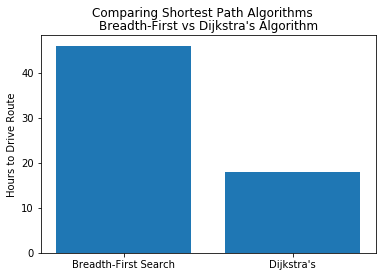

In [87]:
plt.bar(["Breadth-First Search", "Dijkstra's"], [breadth_first_time, cheapest_cost])
plt.ylabel("Hours to Drive Route")
plt.suptitle("Comparing Shortest Path Algorithms")
plt.title("Breadth-First vs Dijkstra's Algorithm")

plt.show()

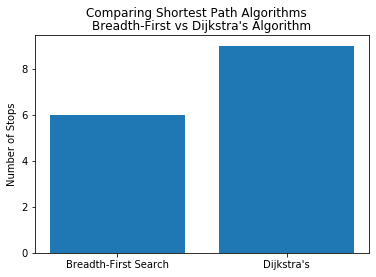

In [90]:
plt.bar(["Breadth-First Search", "Dijkstra's"], [len(bfs_ny_la)-1, len(cheapest_route)-1])
plt.ylabel("Number of Stops")
plt.suptitle("Comparing Shortest Path Algorithms")
plt.title("Breadth-First vs Dijkstra's Algorithm")
plt.show()

### Executive Summary
<br>
The above assignment compared breadth-first search and Dijkstra's algorithm.  Breadth-first seeks the route with the least amount of stops while Dijkstra's algorithm searches for the "cheapest" route at each node.  Breadth-first found a route with only 6 stops.  However, Dijkstra's route got there  28 hours quicker. Overall, I would recommend Dijkstra's algorithm on weighted graphs and breadth-first on unweighted graphs.